## Title
#### Group Members: Ishan Kumar Singh

### Introduction

### Preliminary exploratory data analysis

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [7]:
data <- read_csv("https://raw.githubusercontent.com/jeffreyykim/DSCI-project-009-40-Group_Contract/94fda1d002bf5ab24d2be98a7c63061a1dad7ab0/heart.csv")

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
# cleaning and wrangling the data, renaming the values in a column
data <- data |>
        mutate(HeartDisease = as_factor(HeartDisease)) |>
        mutate(HeartDisease = fct_recode(HeartDisease, "Positive" = "1", "Negative" = "0"))
# selecting only the relevant columns
selected_data <- select(data, HeartDisease, Cholesterol,  Age, RestingBP, MaxHR, Sex) |>
                 filter(Cholesterol != 0, MaxHR !=0, RestingBP != 0)
# spliting data into testing and training sets
data_split <- initial_split(selected_data, prop = 0.75, strata = HeartDisease)
training_data <- training(data_split)
testing_data <- testing(data_split)
training_data
testing_data

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `HeartDisease = fct_recode(HeartDisease, Positive = "1",
  Negative = "0")`.
Caused by warning:
! Unknown levels in `f`: 1, 0”


HeartDisease,Cholesterol,Age,RestingBP,MaxHR,Sex
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Negative,195,54,150,122,M
Negative,237,45,130,170,F
Negative,208,54,110,142,M
⋮,⋮,⋮,⋮,⋮,⋮
Positive,264,45,110,132,M
Positive,193,68,144,141,M
Positive,236,57,130,174,F


HeartDisease,Cholesterol,Age,RestingBP,MaxHR,Sex
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Negative,289,40,140,172,M
Negative,283,37,130,98,M
Negative,339,39,120,170,M
⋮,⋮,⋮,⋮,⋮,⋮
Positive,197,63,124,136,F
Positive,241,57,140,123,F
Positive,131,57,130,115,M


In [16]:
# characteristics of the training data
training_data |>
group_by(HeartDisease, Sex) |>
summarize(Mean_Cholesterol = mean(Cholesterol, na.rm = TRUE), Mean_Age = mean(Age, na.rm = TRUE), Mean_RestingBP = mean(RestingBP, na.rn = TRUE),
          Mean_MaxHR = mean(MaxHR, na.rm = TRUE))

`summarise()` has grouped output by 'HeartDisease'. You can override using the
`.groups` argument.


HeartDisease,Sex,Mean_Cholesterol,Mean_Age,Mean_RestingBP,Mean_MaxHR
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,F,249.3551,51.44860,128.0841,149.7290
Negative,M,234.5243,49.69730,131.1784,149.3784
Positive,F,281.8750,55.59375,145.3438,139.5938
Positive,M,245.9191,55.45106,135.4468,128.8213


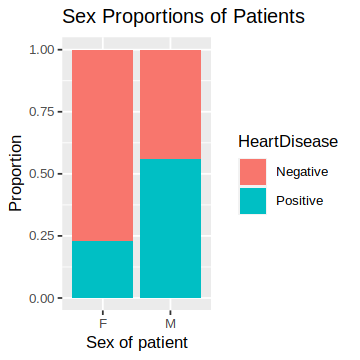

In [45]:
options(repr.plot.width = 3, repr.plot.height = 3)
sex_prop <- ggplot(training_data, aes(x = Sex, fill = HeartDisease)) + geom_bar(position = "fill") +
         labs(x = "Sex of patient", y = "Proportion", colour = "Heart Disease") + ggtitle("Sex Proportions of Patients") +
         theme(text = element_text(size=10))
sex_prop

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


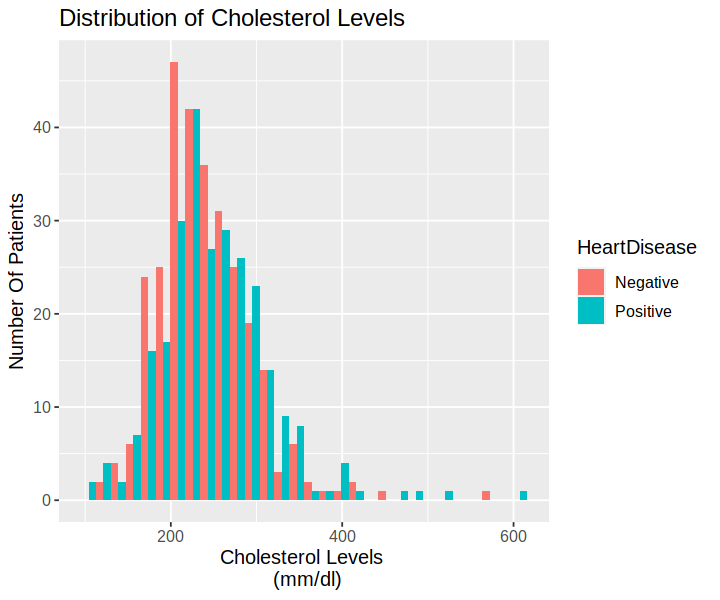

In [46]:
options(repr.plot.width = 6, repr.plot.height = 5)
cholesterol_dist <- ggplot(training_data, aes(x = Cholesterol, fill = HeartDisease)) + geom_histogram(position = "dodge") + 
         labs(x = "Cholesterol Levels \n (mm/dl)", y = "Number Of Patients", colour = "Heart Disease") + ggtitle("Distribution of Cholesterol Levels") +
         theme(text = element_text(size=12)) 
cholesterol_dist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


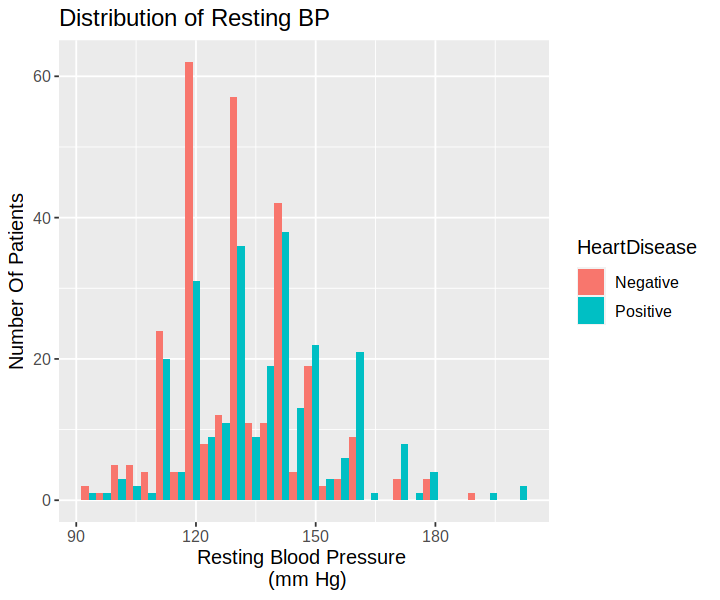

In [47]:
restbp_dist <- ggplot(training_data, aes(x = RestingBP, fill = HeartDisease)) + geom_histogram(position = "dodge") + 
         labs(x = "Resting Blood Pressure \n (mm Hg)", y = "Number Of Patients", colour = "Heart Disease") + ggtitle("Distribution of Resting BP") +
         theme(text = element_text(size=12)) 
restbp_dist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


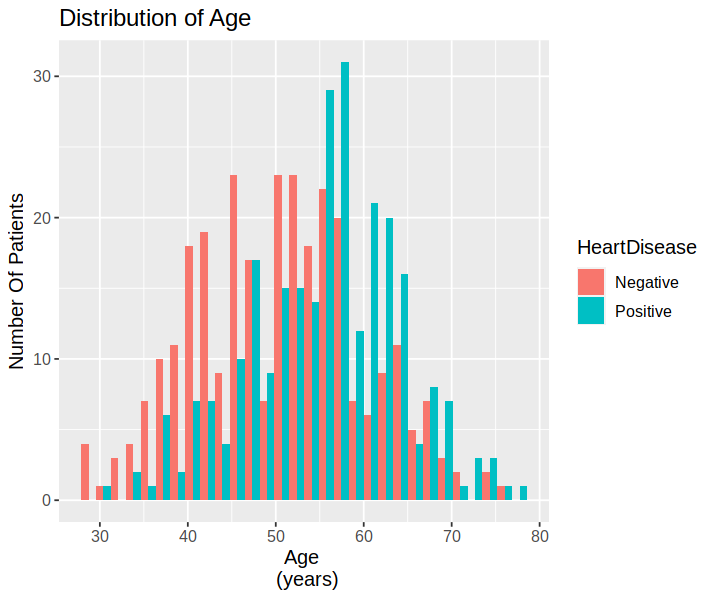

In [48]:
age_dist <- ggplot(training_data, aes(x = Age, fill = HeartDisease)) + geom_histogram(position = "dodge") + 
         labs(x = "Age \n (years)", y = "Number Of Patients", colour = "Heart Disease") + ggtitle("Distribution of Age") +
         theme(text = element_text(size=12)) 
age_dist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


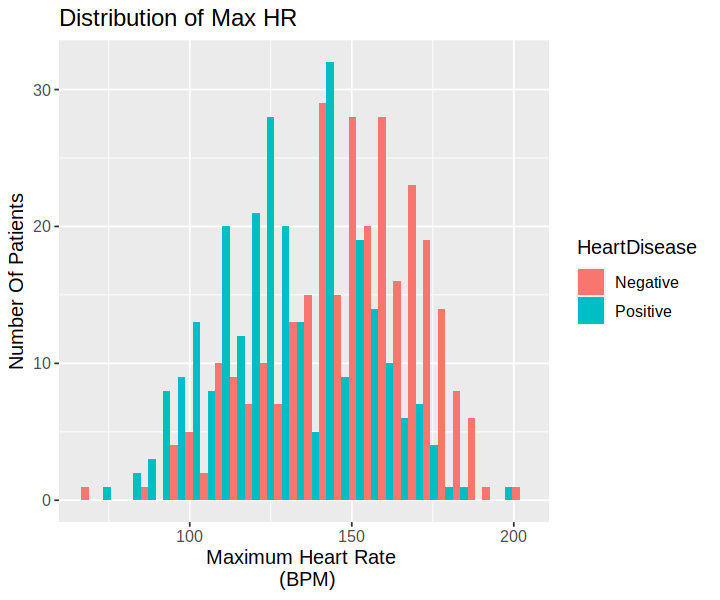

In [49]:
maxhr_dist <- ggplot(training_data, aes(x = MaxHR, fill = HeartDisease)) + geom_histogram(position = "dodge") + 
         labs(x = "Maximum Heart Rate \n (BPM)", y = "Number Of Patients", colour = "Heart Disease") + ggtitle("Distribution of Max HR") +
         theme(text = element_text(size=12)) 
maxhr_dist

### Methods:
**Variables used:**
- Age (years)
- Sex (Male[M] / Female[F])
- RestingBP (mm Hg)
- Cholesterol (mm/dl)
- MaxHR (BPM)
- HeartDisease

**Procedure**
1) Importing the libraries and data from Kaggle into R.
2) Cleaning, wrangling and renaming of data into R. Selecting only columns based on preliminary analysis of data.
3) Splitting into training and testing data. Scaling the data while making recipes.
4) Find best value of k to be used by cross validation of training data.
5) Using this k value to build our model and testing it onto the testing set.
6) Measuring the accuracy and analyzing the confusion matrix.

*Visualize: We will visualize the results of our model by plotting a scatter plot between the variables such as MaxHR and Age or Age and Cholesterol while coloring background of the plots based on the diagnosis of heart disease to check if our model is under/over fitting.*

### Expected outcomes and significance: